In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

In [33]:
def generate_data(centers, std_dev, export_name, n_points_each=100, outliers_to_add=[]):
    n_dim = len(centers[0])

    classes = [np.random.normal(loc=np.array(centers[i]), scale=std_dev, size=(n_points_each, n_dim)) for i in range(len(centers))]

    for point in outliers_to_add:
        classes.append(np.array([point]))

    # Plot the data
    plt.figure()
    for i in classes:
        plt.scatter(i[:, 0], i[:, 1])

    # Create a DataFrame with a column for the x values, a column for the y values, and a column for the class
    df = pd.DataFrame(np.concatenate(classes), columns=['x', 'y'])
    df['class'] = np.concatenate([[i]*n_points_each for i in range(len(centers))] + [[-1]*len(outliers_to_add)])

    # shuffle
    df = df.sample(frac=1).reset_index(drop=True)
    
    # Export the data
    df.to_csv(export_name, index=False)

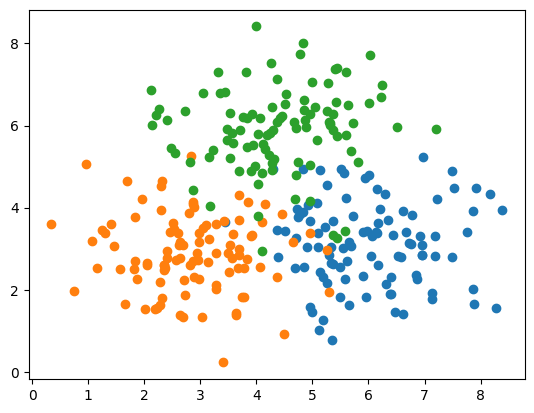

In [34]:
generate_data([[6, 3], [3, 3], [4.5, 6]], 1.0, 'three_clusters2D_synth.csv')